In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mn

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(display='diagram')

#Nate shared this list as his ultimate go-to during our regresssion hack-a-thon

In [2]:
df_ames_train = pd.read_csv('./datasets/train.csv')

I know I need to split my data into train/test before I do any data transformations and build any models.

In [3]:
df_ames_ridge_cat_train = df_ames_train[['Overall Qual','Gr Liv Area', 'Garage Cars',
'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Neighborhood',
'Open Porch SF', 'Wood Deck SF', 'Lot Area', 'SalePrice']]

In [4]:
df_ames_ridge_cat_train.isna().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       1
Total Bsmt SF     1
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
TotRms AbvGrd     0
Fireplaces        0
BsmtFin SF 1      1
Neighborhood      0
Open Porch SF     0
Wood Deck SF      0
Lot Area          0
SalePrice         0
dtype: int64

In [5]:
#I am totally okay with dropping the rows with missing data
df_ames_ridge_cat_train.dropna(inplace=True)

C:\Users\sarah\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
df_ames_ridge_cat_train.isna().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
TotRms AbvGrd     0
Fireplaces        0
BsmtFin SF 1      0
Neighborhood      0
Open Porch SF     0
Wood Deck SF      0
Lot Area          0
SalePrice         0
dtype: int64

In [7]:

X = df_ames_ridge_cat_train[['Overall Qual','Gr Liv Area', 'Garage Cars',
'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1','Neighborhood',
'Open Porch SF', 'Wood Deck SF', 'Lot Area']]
y = df_ames_ridge_cat_train['SalePrice']
    

In [8]:
X.shape

(2049, 15)

In [9]:
y.shape

(2049,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
X_train.dtypes

Overall Qual        int64
Gr Liv Area         int64
Garage Cars       float64
Total Bsmt SF     float64
1st Flr SF          int64
Year Built          int64
Year Remod/Add      int64
Full Bath           int64
TotRms AbvGrd       int64
Fireplaces          int64
BsmtFin SF 1      float64
Neighborhood       object
Open Porch SF       int64
Wood Deck SF        int64
Lot Area            int64
dtype: object

In [12]:
'''
ct1 = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object)),
    remainder='passthrough',
     verbose_feature_names_out=False)
'''

"\nct1 = make_column_transformer(\n    (OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object)),\n    remainder='passthrough',\n     verbose_feature_names_out=False)\n"

In [13]:
ct1 = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['Neighborhood', 'Overall Qual']),
    remainder='passthrough',
     verbose_feature_names_out=False)


In [14]:
pipe3 = make_pipeline(ct1, StandardScaler(), Ridge(max_iter=10_000))

In [15]:
params3 = {
           'ridge__alpha': [.01, 0.1, 1, 10, 100]}

In [16]:
gs3 = GridSearchCV(pipe3, params3, n_jobs=-1)

In [17]:
pipe3.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'standardscaler', 'ridge', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__onehotencoder', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'ridge__alpha', 'ridge__copy_X', 'ridge__fit_intercept', 'ridge__max_iter', 'ridge__normalize', 'ridge__positive', 'ridge__random_state', 'ridge__solver', 'ridge__tol'])

In [18]:
ct1.get_feature_names_out



<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Neighborhood', 'Overall Qual'])],
                  verbose_feature_names_out=False)>

In [19]:
gs3.fit(X_train, y_train)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sarah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sarah\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\sarah\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\sarah\anacond

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [ ]:
pd.DataFrame(gs3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016204,0.002638,0.004402,0.000490,0.01,{'ridge__alpha': 0.01},0.803866,0.850385,0.698001,0.877389,0.859468,0.817822,0.064645,5
1,0.012803,0.002926,0.003803,0.000748,0.1,{'ridge__alpha': 0.1},0.803865,0.850398,0.698028,0.877385,0.859471,0.817830,0.064636,4
2,0.008802,0.001167,0.004601,0.001202,1,{'ridge__alpha': 1},0.803848,0.850527,0.698300,0.877345,0.859501,0.817904,0.064545,3
3,0.009802,0.002041,0.003802,0.000749,10,{'ridge__alpha': 10},0.803673,0.851756,0.700835,0.876944,0.859771,0.818596,0.063702,2
4,0.009202,0.001167,0.003801,0.000401,100,{'ridge__alpha': 100},0.801309,0.860185,0.715994,0.873078,0.860934,0.822300,0.058733,1


In [ ]:
gs3.best_params_

{'ridge__alpha': 100}

In [ ]:
gs3.best_estimator_.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['Neighborhood', 'Overall Qual'])],
                   verbose_feature_names_out=False),
 'standardscaler': StandardScaler(),
 'ridge': Ridge(alpha=100, max_iter=10000)}

In [ ]:
gs3.best_estimator_.named_steps['standardscaler'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37',
       'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49'], dtype=object)

In [ ]:
gs3.best_params_

{'ridge__alpha': 100}

In [ ]:
gs3.best_score_

0.8223001224704596

In [ ]:
cols_g3 = gs3.best_estimator_.named_steps.get('columntransformer').get_feature_names_out()
cols_g3

array(['Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Overall Qual_1', 'Overall Qual_2',
       'Overall Qual_3', 'Overall Qual_4', 'Overall Qual_5',
       'Overall Qual_6', 'Overall Qual_7', 'Overall Qual_8',
       'Overall Qual_9', 'Overall Qual_10', 'Gr Liv Area', 'Garage Cars',
       'Total Bsmt SF', '1st Flr

In [ ]:
gs3.best_estimator_.named_steps['ridge'].coef_

array([ -437.19901898,  -917.98425528, -1542.19616553,   170.41496322,
         882.56036313,   672.11588388,  3030.42574045, -3504.40611128,
       -1110.97501731,  -617.67183723,  3613.03064831, -1500.23140727,
       -2343.36865872, -1455.74315566, -1321.23353297, -1149.2381929 ,
       -1280.11407472,  4788.58871086,  6348.88010597, -2446.01429992,
        -269.88200941, -1819.09880988, -1341.85798319,  1546.48483576,
        5229.08054473,   805.50431638,   344.41595379,  -876.64632055,
       -2430.46711516, -3954.05735582, -4972.95539421, -6988.1013118 ,
       -4446.02178899,   323.37407023,  8237.8578723 , 15849.83863852,
       11373.85839213, 16711.98471814,  6402.4513824 ,  5585.40423436,
         956.16000846,  7740.3507768 ,  7294.36612075,  1021.64844496,
        3106.44123236,  5664.19530479,  8420.69085575,  1127.25800938,
        1820.11235263,  5141.3139119 ])

In [ ]:
X_train.columns

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF',
       '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
       'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Neighborhood',
       'Open Porch SF', 'Wood Deck SF', 'Lot Area'],
      dtype='object')

In [ ]:
pd.DataFrame(zip(cols_g3, 
gs3.best_estimator_.named_steps['ridge'].coef_))

,0,1
0,Neighborhood_Blmngtn,-458.341162
1,Neighborhood_Blueste,-1418.129379
2,Neighborhood_BrDale,-1992.137381
3,Neighborhood_BrkSide,-603.208975
4,Neighborhood_ClearCr,439.222325
5,Neighborhood_CollgCr,169.350659
6,Neighborhood_Crawfor,4230.536501
7,Neighborhood_Edwards,-4573.009082
8,Neighborhood_Gilbert,-1868.907895
9,Neighborhood_Greens,-264.260925


In [ ]:
gs3.best_estimator_.named_steps['ridge'].intercept_

181168.1744791667

In [ ]:
gs3.score(X_test, y_test)

0.8722631414476022

In [ ]:
#Make predictions on the test set
preds = gs3.predict(X_test)

In [ ]:
#Evaluate my metrics
print('Ridge Model #2 w/Categorical Vars: MAE:', mean_absolute_error(y_test, preds))
print('Ridge Model #2 w/Categorical Vars: MSE:', mean_squared_error(y_test, preds))
print('Ridge Model #2 w/Categorical Vars: R2:', r2_score(y_test, preds))

Ridge Model #2 w/Categorical Vars: MAE: 18619.680508792437
Ridge Model #2 w/Categorical Vars: MSE: 761773729.1766388
Ridge Model #2 w/Categorical Vars: R2: 0.8722631414476022


This model beats all four previous models! The Rsquared here is .8723 compared to .8561 for the Ridge model without the categorical variables versus .7186 for the Lasso model,  -.0037 for the baseline model and .5667 for the linear regression model.

In [ ]:
#I want to look at some graphs of my residuals
residuals = preds - y_test

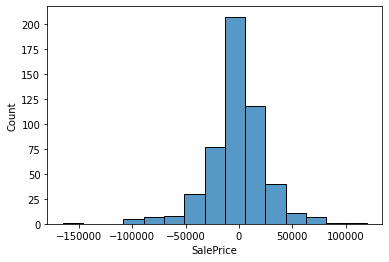

In [ ]:
sns.histplot(residuals, bins=15);
#This looks like a normal distribution so this doesn't look too bad.

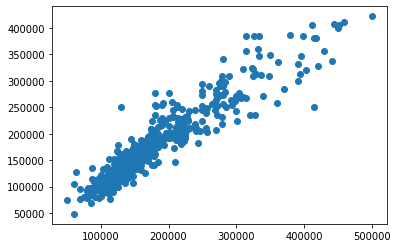

In [ ]:
plt.scatter(y_test, preds);
#This doesn't look too bad!

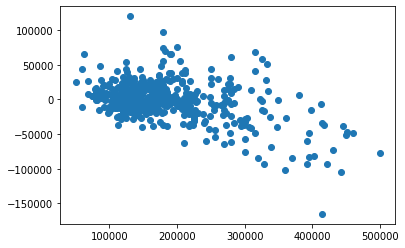

In [ ]:
plt.scatter(y_test, residuals);
#That outlier at 200,000 is strange.

In [ ]:
#Now, I want to use my Ridge model to score the separate test dataset so 
# that I can submit a csv file to Kaggle for the contest.

df_ames_test = pd.read_csv('./datasets/test.csv')

In [ ]:
df_ames_test.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [ ]:
#Pull off only the data I need
df_mini_ridge_ohe_test = df_ames_test[['Overall Qual', 'Gr Liv Area', 'Garage Cars',
'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Neighborhood',
'Open Porch SF', 'Wood Deck SF', 'Lot Area']]

In [ ]:
#Yay!  No missing data here!
df_mini_ridge_ohe_test.isna().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
TotRms AbvGrd     0
Fireplaces        0
BsmtFin SF 1      0
Neighborhood      0
Open Porch SF     0
Wood Deck SF      0
Lot Area          0
dtype: int64

In [ ]:
df_mini_ridge_ohe_test.describe()

,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,TotRms AbvGrd,Fireplaces,BsmtFin SF 1,Open Porch SF,Wood Deck SF,Lot Area
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,6.050114,1496.914579,1.742597,1034.357631,1145.787016,1970.492027,1984.417995,1.539863,6.454442,0.618451,441.328018,47.070615,93.430524,10307.033030
std,1.369065,506.468967,0.750391,413.446291,375.264111,30.395895,20.450725,0.559060,1.596632,0.669571,438.457329,68.180939,121.181702,10002.674602
min,2.000000,407.000000,0.000000,0.000000,407.000000,1880.000000,1950.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1477.000000
25%,5.000000,1114.000000,1.000000,789.000000,864.000000,1954.000000,1967.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,7297.250000
50%,6.000000,1436.000000,2.000000,975.000000,1063.000000,1972.000000,1992.000000,2.000000,6.000000,1.000000,373.000000,27.000000,0.000000,9446.000000
75%,7.000000,1779.000000,2.000000,1247.000000,1358.000000,1999.750000,2003.000000,2.000000,7.000000,1.000000,734.750000,69.750000,170.750000,11589.000000
max,10.000000,4476.000000,4.000000,2630.000000,2674.000000,2010.000000,2010.000000,4.000000,12.000000,3.000000,2288.000000,742.000000,690.000000,215245.000000


In [ ]:
X_mini_ridge_ohe_test = df_mini_ridge_ohe_test

In [ ]:
preds_rdg_kag = gs3.predict(X_mini_ridge_ohe_test)

In [ ]:
df_ames_test['SalePrice'] = preds_rdg_kag

In [ ]:
df_ames_test[['Id', 'SalePrice']].to_csv('./datasets/rdg_predictions_ohe.csv', index = False)

#Used code from Chuck's Breakfast Hour Quiz3 Review

In [ ]:
df_kaggle = pd.read_csv('./datasets/rdg_predictions_ohe.csv')

In [ ]:
df_kaggle.head(2)

,Id,SalePrice
0,2658,133914.990982
1,2718,179090.045185
